# 03.1 Decision Tree Algorithms for SECOM dataset
#### SECOM: semiconductor quality data
#### B05704007 國企四 賴昱瑋
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## (a) Data Summary


In [2]:
secom = pd.read_excel(r'/SECOM.xlsx', 'secom')
secom = secom.iloc[:, 1:592] # last column is date, and we will not use it in analysis
secom.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,Sensor_22,Sensor_23,Sensor_24,Sensor_25,Sensor_26,Sensor_27,Sensor_28,Sensor_29,Sensor_30,Sensor_31,Sensor_32,Sensor_33,Sensor_34,Sensor_35,Sensor_36,Sensor_37,Sensor_38,Sensor_39,Sensor_40,...,Sensor_552,Sensor_553,Sensor_554,Sensor_555,Sensor_556,Sensor_557,Sensor_558,Sensor_559,Sensor_560,Sensor_561,Sensor_562,Sensor_563,Sensor_564,Sensor_565,Sensor_566,Sensor_567,Sensor_568,Sensor_569,Sensor_570,Sensor_571,Sensor_572,Sensor_573,Sensor_574,Sensor_575,Sensor_576,Sensor_577,Sensor_578,Sensor_579,Sensor_580,Sensor_581,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
secom.describe()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,Sensor_22,Sensor_23,Sensor_24,Sensor_25,Sensor_26,Sensor_27,Sensor_28,Sensor_29,Sensor_30,Sensor_31,Sensor_32,Sensor_33,Sensor_34,Sensor_35,Sensor_36,Sensor_37,Sensor_38,Sensor_39,Sensor_40,...,Sensor_552,Sensor_553,Sensor_554,Sensor_555,Sensor_556,Sensor_557,Sensor_558,Sensor_559,Sensor_560,Sensor_561,Sensor_562,Sensor_563,Sensor_564,Sensor_565,Sensor_566,Sensor_567,Sensor_568,Sensor_569,Sensor_570,Sensor_571,Sensor_572,Sensor_573,Sensor_574,Sensor_575,Sensor_576,Sensor_577,Sensor_578,Sensor_579,Sensor_580,Sensor_581,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1564.0,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1557.000000,1567.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,...,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1566.000000,1566.000000,1566.000000,1566.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,618.000000,618.000000,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,0.000146,0.964353,199.956809,0.0,9.005371,413.086035,9.907603,0.971444,190.047354,12.481034,1.405054,-5618.393610,2699.378435,-3806.299734,-298.598136,1.203845,1.938477,6.638628,69.499532,2.366197,0.184159,3.673189,85.337469,8.960279,50.582639,64.555787,49.417370,66.221274,86.836577,118.679554,...,1.230712,0.276688,7.703874,0.503657,57.746537,4.216905,1.623070,0.995009,0.325708,0.072443,32.284956,262.729683,0.679641,6.444985,0.145610,2.610870,0.060086,2.452417,21.117674,530.523623,2.101836,28.450165,0.345636,9.162315,0.104729,5.563747,16.642363,0.021615,0.016829,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,0.009302,0.012452,3.257276,0.0,2.796596,17.221095,2.403867,0.012062,2.781041,0.217965,0.016737,626.822178,295.498535,1380.162148,2902.690117,0.177600,0.189495,1.244249,3.461181,0.408694,0.032944,0.535322,2.026549,1.344456,1.182618,2.574749,1.182619,0.304141,0.446756,1.807221,...,1.361117,0.276231,2.192647,0.598852,35.207552,1.280008,1.870433,0.083860,0.201392,0.051578,19.026081,7.630585,0.121758,2.633583,0.081122,1.032761,0.032761,0.996644,10.213294,17.499736,0.275112,86.304681,0.248478,26.920150,0.067791,16.921369,12.485267,0.011730,0.009640,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,-0.034900,0.655400,182.094000,0.0,2.249300,333.448600,4.469600,0.579400,169.177400,9.877300,1.179700,-7150.250000,0.000000,-9986.750000,-14804.500000,0.000000,0.000000,0.000000,59.400000,0.666700,0.034100,2.069800,83.182900,7.603200,49.834800,63.677400,40.228900,64.919300,84.732700,111.712800,...,0.120000,0.018700,2.786000,0.052000,4.826900,1.496700,0.164600,0.891900,0.069900,0.017700,7.236900,242.286000,0.304900,0.970000,0.022400,0.412200,0.009100,0.370600,3.250400,317.196400,0.980200,3.540000,0.066700,1.039500,0.023000,0.663600,4.582000,-0.016900,0.003200,0.001000,0.000000,0.4778

In [4]:
corr_matrix = secom.iloc[:,0:591].corr()
'''
corr_matrix0 = secom.iloc[:,0:200].corr()
corr_matrix0.style.background_gradient(cmap='coolwarm')
'''

"\ncorr_matrix0 = secom.iloc[:,0:200].corr()\ncorr_matrix0.style.background_gradient(cmap='coolwarm')\n"

'Label' ==  1:  104
'Label' == -1:  1463


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


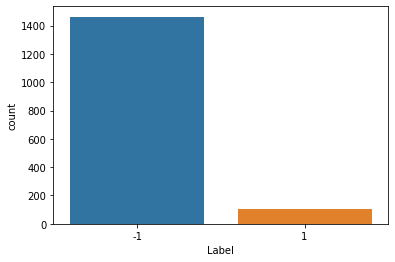

In [5]:
print("'Label' ==  1: ", len(secom[secom['Label'] == 1]))
print("'Label' == -1: ", len(secom[secom['Label'] == -1]))
sns.countplot(secom['Label'])

There is a data imblance problem. There are only 104 cases which are tagged as postive (bad: label = 1), and 1463 cases which are tagged as negative (good: label = -1).

---
## (b) Problem of the dataset

### Missing Value & duplicate columns
#### Missing Value

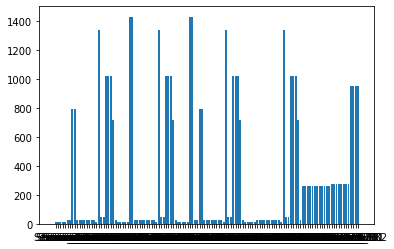

In [6]:
na_df = []
for col in secom:
  na_df.append([str(col), secom[str(col)].isnull().sum()])

na_df = pd.DataFrame(na_df, columns=['Sensor', 'Na_Count'])

plt.bar(na_df[na_df['Na_Count'] > 10]['Sensor'], na_df[na_df['Na_Count'] > 10]['Na_Count'])
plt.show()

In [7]:
# Identify the columns with over 200 na
na_df[na_df['Na_Count'] > 200].transpose()

,72,73,85,109,110,111,112,157,158,220,244,245,246,247,292,293,345,346,358,382,383,384,385,492,516,517,518,519,546,547,548,549,550,551,552,553,554,555,556,557,562,563,564,565,566,567,568,569,578,579,580,581
Sensor,Sensor_73,Sensor_74,Sensor_86,Sensor_110,Sensor_111,Sensor_112,Sensor_113,Sensor_158,Sensor_159,Sensor_221,Sensor_245,Sensor_246,Sensor_247,Sensor_248,Sensor_293,Sensor_294,Sensor_346,Sensor_347,Sensor_359,Sensor_383,Sensor_384,Sensor_385,Sensor_386,Sensor_493,Sensor_517,Sensor_518,Sensor_519,Sensor_520,Sensor_547,Sensor_548,Sensor_549,Sensor_550,Sensor_551,Sensor_552,Sensor_553,Sensor_554,Sensor_555,Sensor_556,Sensor_557,Sensor_558,Sensor_563,Sensor_564,Sensor_565,Sensor_566,Sensor_567,Sensor_568,Sensor_569,Sensor_570,Sensor_579,Sensor_580,Sensor_581,Sensor_582
Na_Count,794,794,1341,1018,1018,1018,715,1429,1429,1341,1018,1018,1018,715,1429,1429,794,794,1341,1018,1018,1018,715,1341,1018,1018,1018,715,260,260,260,260,260,260,260,260,260,260,260,260,273,273,273,273,273,273,273,273,949,949,949,949


In [8]:

# Sensor 110~112 245~247 383~385 517~519 - Each of them have missing data in same row
#print(secom[secom['Sensor_410'].isnull()])
#print(secom[secom['Sensor_412'].isnull()])

# Sensor 547~558 - Each of them have missing data in same row
#print(secom[secom['Sensor_547'].isnull()])
#print(secom[secom['Sensor_558'].isnull()])


# Sensor 563~570 - Each of them have missing data in same row
#print(secom[secom['Sensor_563'].isnull()])
#print(secom[secom['Sensor_570'].isnull()])

# Sensor 579~582 - Each of them have missing data in same row
#print(secom[secom['Sensor_579'].isnull()])
#print(secom[secom['Sensor_580'].isnull()])
#print(secom[secom['Sensor_581'].isnull()])
#print(secom[secom['Sensor_582'].isnull()])

# ....

secom_579na = secom[secom['Sensor_579'].isnull()]
print(len(secom_579na[secom_579na['Label'] == 1]))

59


#### duplicate columns
As (a) and the results above shows, there are many duplicate columns
- Select features based on correlation: drop off the variables with correlation larger than 0.9


In [9]:
columns = np.full((secom.shape[1],), True, dtype = bool)
for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] >= 0.95:
            if columns[j]:
                columns[j] = False

selected_columns = secom.columns[columns]
secom = secom[selected_columns]
secom

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,Sensor_22,Sensor_23,Sensor_24,Sensor_25,Sensor_26,Sensor_27,Sensor_29,Sensor_30,Sensor_31,Sensor_32,Sensor_33,Sensor_34,Sensor_35,Sensor_36,Sensor_37,Sensor_38,Sensor_39,Sensor_40,Sensor_41,...,Sensor_514,Sensor_515,Sensor_516,Sensor_522,Sensor_529,Sensor_530,Sensor_531,Sensor_532,Sensor_533,Sensor_534,Sensor_535,Sensor_536,Sensor_537,Sensor_538,Sensor_539,Sensor_547,Sensor_548,Sensor_549,Sensor_550,Sensor_551,Sensor_552,Sensor_556,Sensor_559,Sensor_560,Sensor_561,Sensor_563,Sensor_564,Sensor_565,Sensor_566,Sensor_570,Sensor_571,Sensor_572,Sensor_573,Sensor_574,Sensor_579,Sensor_580,Sensor_582,Sensor_583,Sensor_584,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0616,395.570,75.752,0.4234,12.93,0.78,39.8842,1.0344,0.4385,0.1039,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,NaN,NaN,NaN,0.5005,0.0118,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3526,408.798,74.640,0.7193,16.00,1.33,53.1836,0.9634,0.1745,0.0375,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,0.0096,0.0201,208.2045,0.5019,0.0223,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7942,411.136,74.654,0.1832,16.16,0.85,23.0713,1.5021,0.3718,0.1233,267.064,0.9032,1.10,0.6219,68.8489,535.0245,2.0293,11.21,0.1882,0.0584,0.0484,82.8602,0.4958,0.0157,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,76.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1650,372.822,72.442,1.8804,131.68,39.33,161.4081,1.1613,0.7288,0.2710,268.228,0.6511,7.32,0.1630,25.0363,530.5682,2.0253,9.33,0.1738,0.0202,0.0149,73.8432,0.4990,0.0103,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,76.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4636,399.914,79.156,1.0388,19.63,1.98,70.9706,0.9778,0.2156,0.0461,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,NaN,NaN,NaN,0.4800,0.4766,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,-0.0057,0.9579,203.9867,0.0,11.7692,419.3404,10.2397,0.9693,193.7470,12.5373,1.4072,-5418

#### Identical columns
Many columns contains just same value or all of them are NAs. -> Remove all these variables.

In [10]:
uni_lst = []
for col in secom:
  if secom[str(col)].nunique() == 1:
    uni_lst.append(str(col))

secom = secom.drop(uni_lst, axis = 1) # delete all columns with single value

In [11]:
# Impute other missing value
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp.fit(secom)
secom_impute = imp.transform(secom) 

---
## (c) CART: prepared dataset
#### Reference:
- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [12]:
# Seperate the dataset into a training set and a testing set
from sklearn.model_selection import train_test_split
x_pre_train, x_pre_test, y_pre_train, y_pre_test = train_test_split(secom_impute[:, 0:-1], secom_impute[:, -1], test_size = 0.3)
y_pre_train = np.array(y_pre_train, dtype=int)
y_pre_test = np.array(y_pre_test, dtype=int)

In [13]:
from sklearn.tree import DecisionTreeClassifier
DT_Classifier = DecisionTreeClassifier(criterion='gini')
clf = DT_Classifier.fit(x_pre_train, y_pre_train) 

### 10-fold cross vaildation Result

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_pre_train, y_pre_train, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.87272727 0.91818182 0.88181818 0.85454545 0.89090909 0.87272727
 0.88073394 0.86238532 0.89908257 0.86238532]
Accuracy: 0.88 (+/- 0.04)


### Result

In [15]:
predict_results = []
expect_results = []

expect_results.extend(y_pre_test)
predict_results.extend(clf.predict(x_pre_test))

print(expect_results,'\n', predict_results)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(predict_results, expect_results))
print(confusion_matrix(y_pre_test, predict_results))

              precision    recall  f1-score   support

          -1       0.93      0.93      0.93       437
           1       0.14      0.15      0.14        34

    accuracy                           0.87       471
   macro avg       0.54      0.54      0.54       471
weighted avg       0.88      0.87      0.87       471

[[406  29]
 [ 31   5]]


<Figure size 432x288 with 0 Axes>

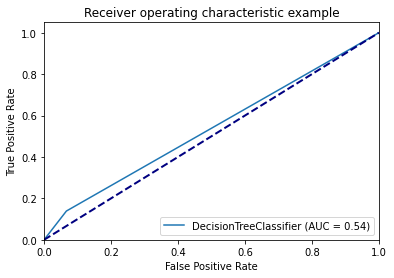

In [17]:
from sklearn import metrics

plt.figure()
lw = 2
metrics.plot_roc_curve(clf, x_pre_test, y_pre_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

The model tend to predict all observation to be -1 (True postive = 406 and False postive = 29). That is, the model cannot provide good prediction when the item failed the test (label = 1). Both precision and recall are low for label = 1.

---
## (d) Data imblance: build a new balanced dataset
As the description shows in (a), we can find that there is a data imblance problem. With only 104 observations with label is 1, the observations with labels = -1 are over 10 times larger than the set of -1.
### Solve the problem: create a set that Label(==-1):Label(==1) = 1:1
Random select 104 obsservations with label == 1 and combine with all obs with label == -1

'Label' ==  1:  104
'Label' == -1:  1463


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


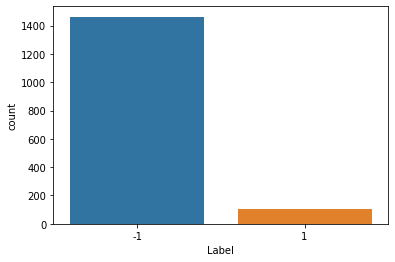

In [18]:
print("'Label' ==  1: ", len(secom[secom['Label'] == 1]))
print("'Label' == -1: ", len(secom[secom['Label'] == -1]))
sns.countplot(secom['Label'])

In [19]:
secom_balanced = secom[secom['Label'] == -1].sample(n = 104)
secom_balanced = secom_balanced.append(secom[secom['Label'] == 1])
secom_balanced.shape

(208, 287)

In [20]:
# impute the missing data
secom_balanced_impute = imp.transform(secom_balanced)

---
## (e) CART for balanced dataset

In [21]:
# Seperate the dataset into a training set and a testing set
x_bal_train, x_bal_test, y_bal_train, y_bal_test = train_test_split(secom_balanced_impute[:, 0:-1], secom_balanced_impute[:, -1], test_size = 0.3)
y_bal_train = np.array(y_bal_train, dtype=int)
y_bal_test = np.array(y_bal_test, dtype=int)

In [22]:
clf_balanced = DT_Classifier.fit(x_bal_train, y_bal_train)

In [23]:
scores = cross_val_score(clf_balanced, x_bal_train, y_bal_train, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.46666667 0.4        0.6        0.66666667 0.33333333 0.35714286
 0.28571429 0.78571429 0.64285714 0.57142857]
Accuracy: 0.51 (+/- 0.32)


In [24]:
predict_results_balanced = []
expect_results_balanced = []

expect_results_balanced.extend(y_bal_test.tolist())
predict_results_balanced.extend(clf_balanced.predict(x_bal_test))

print(expect_results_balanced,'\n', predict_results_balanced)

[-1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1] 
 [-1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1]


In [25]:
print(classification_report(predict_results_balanced, expect_results_balanced))
print(confusion_matrix(y_bal_test, predict_results_balanced))

              precision    recall  f1-score   support

          -1       0.58      0.47      0.52        32
           1       0.54      0.65      0.59        31

    accuracy                           0.56        63
   macro avg       0.56      0.56      0.55        63
weighted avg       0.56      0.56      0.55        63

[[15 11]
 [17 20]]


<Figure size 432x288 with 0 Axes>

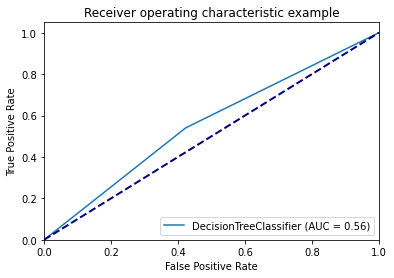

In [26]:
plt.figure()
lw = 2
metrics.plot_roc_curve(clf_balanced, x_bal_test, y_bal_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

The model trained with balanced dataset has better performance for predicting whether items fail the test (label = 1). The precision and recall are both improved than the model build with prepared dataset. True negative is 20. That is, the model can make 20 correct prediction for label = 1 for total 31 failed items. 

---
## (f) Comparison between (c) and (e)

Though (c) had better accuracy, the result does not truly make a good prediction because of the data imblance problem. Compare to the confusion matrix for testing data from two different model, we can conclude that the model build with balanced dataset can make a better prediction to the label for less bosverations (That is, label equals to 1).
The AUC of the balanced model is also lightly larger than prepared model.

---
## (g) Random Forest Method 
With the results presented below, we find out that the prepared random forest model could not provide better results for label = 1 (fail the test). It label all of the obs to label = -1. However, the balanced random forest model has significant improvement for predicting the items failed the test (label = 1). With total 17 failed in testing set, the model can correctly predict 14 with label = 1. The recall of label = 1 is about 0.9. Its AUC is also better than other balanced models.

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

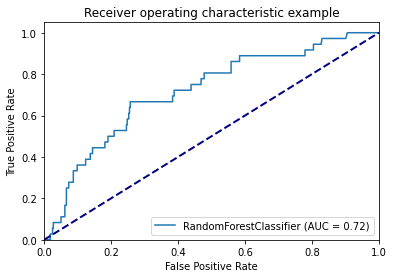

In [27]:
from sklearn.ensemble import RandomForestClassifier

# prepared dataset
RF_Classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
pre_rf_clf = RF_Classifier.fit(x_pre_train, y_pre_train)

predict_results = []
expect_results = []

expect_results.extend(y_pre_test)
predict_results.extend(pre_rf_clf.predict(x_pre_test))

print(expect_results,'\n', predict_results)
print(classification_report(predict_results, expect_results))
print(confusion_matrix(y_pre_test, predict_results))

plt.figure()
lw = 2
metrics.plot_roc_curve(pre_rf_clf, x_pre_test, y_pre_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

[-1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1] 
 [-1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1]
              precision    recall  f1-score   support

          -1       0.88      0.50      0.64        46
           1       0.38      0.82      0.52        17

    accuracy                           0.59        63
   macro avg       0.63      0.66      0.58        63
weighted avg       0.75      0.59      0.61        63

[[23  3]
 [23 14]]


<Figure size 432x288 with 0 Axes>

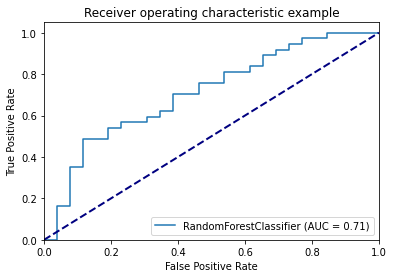

In [28]:
# balanced dataset

bal_rf_clf = RF_Classifier.fit(x_bal_train, y_bal_train)

predict_results = []
expect_results = []

expect_results.extend(y_bal_test)
predict_results.extend(bal_rf_clf.predict(x_bal_test))

print(expect_results,'\n', predict_results)
print(classification_report(predict_results, expect_results))
print(confusion_matrix(y_bal_test, predict_results))

plt.figure()
lw = 2
metrics.plot_roc_curve(bal_rf_clf, x_bal_test, y_bal_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

---
## (h) GBDT Method
The prepared GBDT model is still tend to label all obs to -1. (Still tend to label all obs to 1) However, the balanced model can correctly predict half of the obs with label = 1. Compare to the random forest model, the precision or recall does not improve. The random forest model give us the best prediction for label = 1.

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

<Figure size 432x288 with 0 Axes>

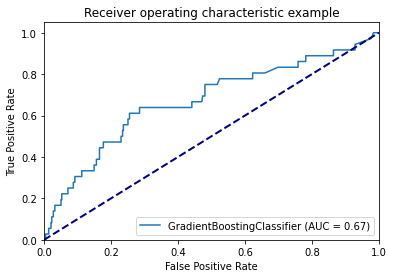

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

# prepared dataset
GRDT_Classifier = GradientBoostingClassifier(random_state=0)
pre_gbdt_clf = GRDT_Classifier.fit(x_pre_train, y_pre_train)

predict_results = []
expect_results = []

expect_results.extend(y_pre_test)
predict_results.extend(pre_gbdt_clf.predict(x_pre_test))

print(expect_results,'\n', predict_results)
print(classification_report(predict_results, expect_results))
print(confusion_matrix(y_pre_test, predict_results))

plt.figure()
lw = 2
metrics.plot_roc_curve(pre_gbdt_clf, x_pre_test, y_pre_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

[-1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1] 
 [-1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1]
              precision    recall  f1-score   support

          -1       0.65      0.47      0.55        36
           1       0.49      0.67      0.56        27

    accuracy                           0.56        63
   macro avg       0.57      0.57      0.56        63
weighted avg       0.58      0.56      0.55        63

[[17  9]
 [19 18]]


<Figure size 432x288 with 0 Axes>

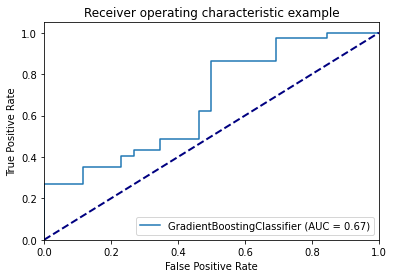

In [30]:
# balanced dataset
bal_gbdt_clf = GRDT_Classifier.fit(x_bal_train, y_bal_train)

predict_results = []
expect_results = []

expect_results.extend(y_bal_test)
predict_results.extend(bal_gbdt_clf.predict(x_bal_test))

print(expect_results,'\n', predict_results)
print(classification_report(predict_results, expect_results))
print(confusion_matrix(y_bal_test, predict_results))

plt.figure()
lw = 2
metrics.plot_roc_curve(bal_gbdt_clf, x_bal_test, y_bal_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()